# Load Dataset

In [1]:
import pandas as pd 

In [2]:
titanic = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S


# Data Preprocessing 

In [4]:
titanic = titanic.rename(columns={'Pclass': 'PassengerClass'})

In [5]:
titanic.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic = titanic.rename(columns={'SibSp': 'SiblingSpouse'})
titanic = titanic.rename(columns={'Parch': 'ParentChild'})

In [7]:
titanic.sample(5)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Cabin,Embarked
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   PassengerClass  891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SiblingSpouse   891 non-null    int64  
 7   ParentChild     891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.isnull().sum()

PassengerId         0
Survived            0
PassengerClass      0
Name                0
Sex                 0
Age               177
SiblingSpouse       0
ParentChild         0
Ticket              0
Fare                0
Cabin             687
Embarked            2
dtype: int64

In [11]:
titanic = titanic.drop(titanic[['Cabin']], axis=1)

In [12]:
titanic.sample(5)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,S


In [13]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [14]:
titanic.isnull().sum()

PassengerId       0
Survived          0
PassengerClass    0
Name              0
Sex               0
Age               0
SiblingSpouse     0
ParentChild       0
Ticket            0
Fare              0
Embarked          2
dtype: int64

In [15]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [16]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [17]:
titanic = titanic.drop(columns={'PassengerId'})

In [18]:
titanic.head()

,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# EDA 

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt 

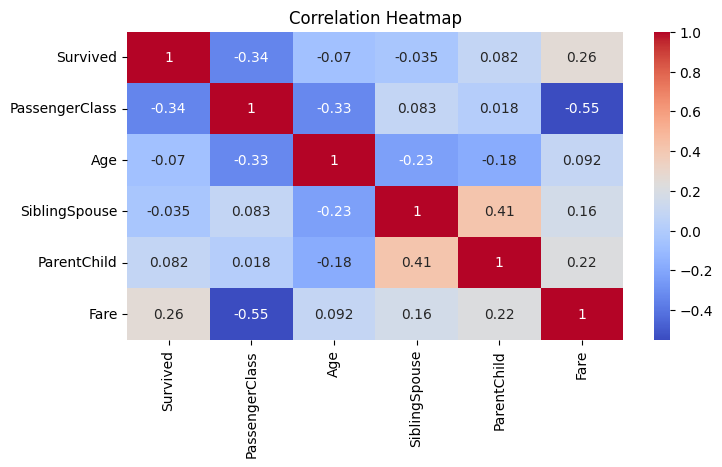

In [20]:
plt.figure(figsize=(8, 4))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

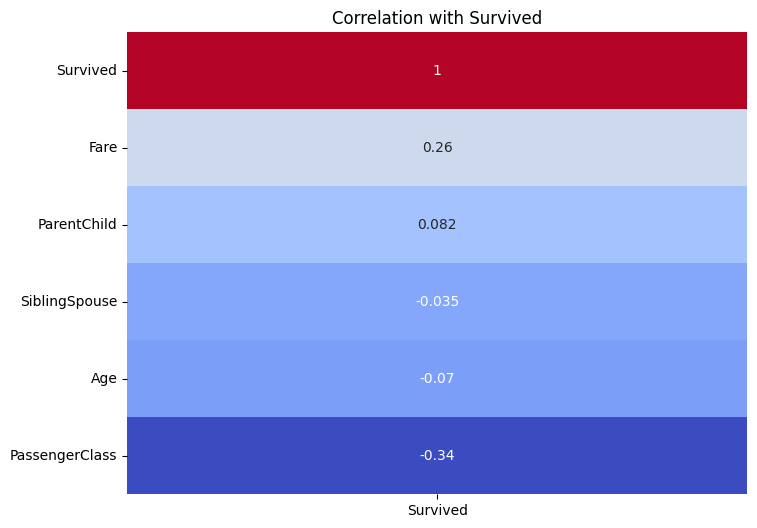

In [21]:
# Show correlation of 'Survived' with other numeric columns
corr_values = titanic.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

# Display as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_values.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation with Survived")
plt.show()

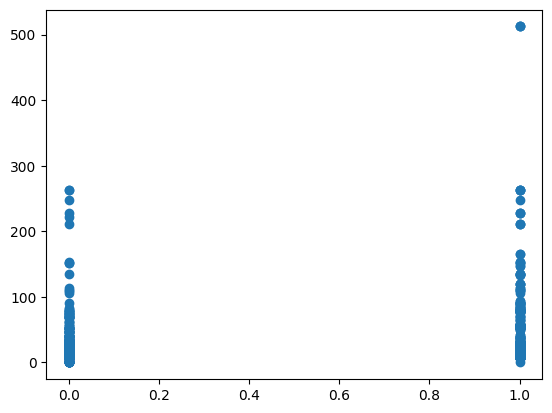

In [22]:
plt.scatter(titanic['Survived'], titanic['Fare'])
plt.show()

In [23]:
titanic.sample(5)

,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked
234,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,S
319,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,C
379,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,S
847,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,C
49,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,S


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

In [26]:
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])

In [27]:
titanic.sample(5)

,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked
577,1,1,"Silvey, Mrs. William Baird (Alice Munger)",0,39.000000,1,0,13507,55.9000,2
32,1,3,"Glynn, Miss. Mary Agatha",0,29.699118,0,0,335677,7.7500,1
796,1,1,"Leader, Dr. Alice (Farnham)",0,49.000000,0,0,17465,25.9292,2
495,0,3,"Yousseff, Mr. Gerious",1,29.699118,0,0,2627,14.4583,0
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2


# Feature Selection 

In [39]:
X = titanic[['PassengerClass', 'Sex', 'Age', 'SiblingSpouse', 'ParentChild', 'Fare', 'Embarked']]
y = titanic['Survived']

In [40]:
X 

,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [41]:
X.shape

(891, 7)

In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train-Test Split 

In [43]:
from sklearn.model_selection import train_test_split 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ML Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the Model 

In [48]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [49]:
y_pred = model.predict(X_test)

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [51]:
import pickle

In [52]:
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)